In [1]:
%matplotlib inline
import sys
from collections import OrderedDict
sys.path.append('..')
from modules.backtesting import BackTesting
import pandas as pd
#from keras.models import load_model
#from modules.factory import norm, fmeasure, recall
import h5py
pd.options.display.float_format = '{:,.2f}'.format #화면에 소숫점 2번째 자리까지만 표시

### 0. Parameters

In [2]:
predic_model_file= '../data/keras models/uptrend-predic(20-240-40).h5'
raw_file = h5py.File('../data/training set/40day_trend_labeled_futures.h5', 'r')

### 1. 전략구현

In [3]:
def strat(days):
    
    def inner(trade):
        data = trade.data
        #추세 누적 지속일수
        data['signal'] = (data.trend.diff(1) != 0).astype('int').cumsum()
        data.trend.replace(to_replace=[0.,1.,2.], value=['short','neutral','long'], inplace=True)
    
        signals = pd.DataFrame(OrderedDict({
            'start': data.groupby('signal').date.nth(days-1),
            'end': data.groupby('signal').date.first().shift(-1),
            'trend': data.groupby('signal').trend.first(),
            'count': data.groupby('signal').size()
        }))
    
        signals = signals[(signals.trend == 'short') | (signals.trend == 'long')].dropna()

        for _, start, end, trend in signals[['start','end','trend']].itertuples():
            buy_price = data.loc[start].open
            trade.buy(trend, start, buy_price)
            
            sell_price = data.loc[end].open
            trade.sell(end, sell_price)
    return inner

In [7]:
back = BackTesting(feed=raw_file, strategy=strat(3), name='Total')

In [8]:
back.run()

trading started. it takes few minutes...
processing..(61)
Done


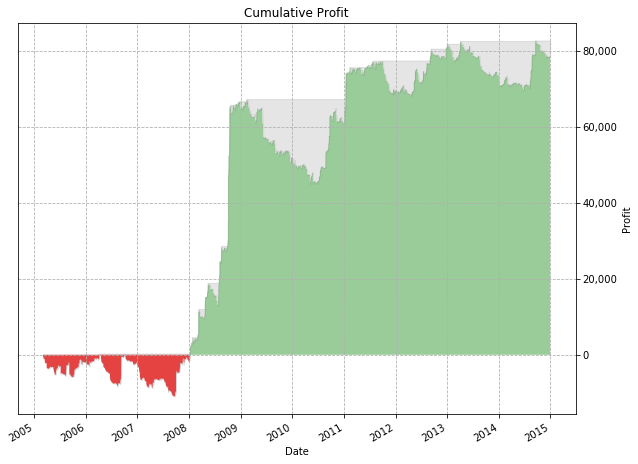

,총손익(틱),CAGR(%),손익비,MDD(틱),승률(%),최대수익(틱),최대손실(틱),연평균 매매횟수
Total,"78,474.88",2.15,1.30,"22,436.40",46.39,"8,193.00","-2,973.00",313.66
Australian Dollar,"2,598.00",1.25,1.68,814.00,54.69,"1,118.00",-685.00,6.62
Soybean Oil,"2,941.00",1.30,1.96,824.00,45.59,"1,456.00",-291.00,7.10
British Pound,"-1,044.00",0.00,0.84,"2,880.00",39.39,649.00,-677.00,6.72
Corn,611.00,0.93,1.26,918.00,47.69,461.00,-548.00,6.65
Canadian Dollar,-216.00,0.00,0.97,"2,482.00",50.68,"1,396.00","-1,622.00",7.57
Crude Oil (WTI),108.00,0.62,1.01,"4,988.00",44.59,"3,889.00","-1,510.00",7.66
Euro FX,"-2,908.00",0.00,0.78,"5,338.00",38.96,"1,516.00","-1,306.00",8.02
Eurodollar,369.00,0.84,1.38,250.00,50.77,268.00,-154.00,6.69
5Year U.S. T-Note,342.00,0.83,1.14,698.00,46.27,536.00,-248.00,6.92


In [9]:
back.summary(level=1)

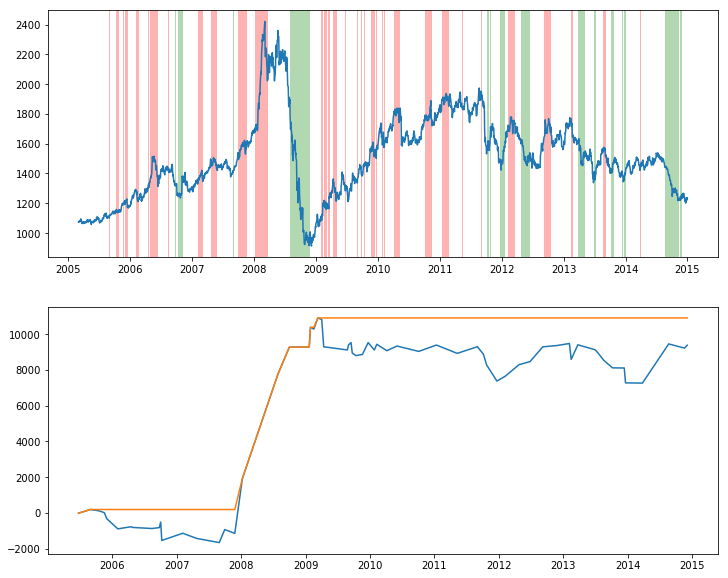

In [16]:
back.trades[20].plot()

In [16]:
statement.profit.min()

-2972.9999999999986

In [17]:
back.trades[20].info

{'activated_date': '2017-07-01',
 'active': 'PLV17',
 'close_time': '06:00:00',
 'commission': 7,
 'currency': 'USD',
 'decimal_places': 1,
 'front': 'PLV17',
 'is_favorite': 0,
 'keep_margin': 2090,
 'last_update': '2017-07-05 10:10:00',
 'market': 'MTL',
 'name': 'Platinum',
 'notation': 10,
 'open_margin': 2090,
 'open_time': '07:00:00',
 'price_gap': 0,
 'tick_unit': 0.1,
 'tick_value': 5.0}

In [21]:
df = pd.DataFrame(columns=['a','b'])